# 1. Scraper

In [ ]:
%pip install selenium
%pip install webdriver-manager

## 1.1 imports + global variables

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
import urllib
import os

football_folder_name = "football_folder"
basketball_folder_name = "basketball_folder"
tennis_folder_name = "tennis_folder"
golf_folder_name = "golf_folder"
volleyball_folder_name = "volleyball_folder"

football_photo_name = "football"
basketball_photo_name = "basketball"
tennisball_photo_name = "tennisball"
golfball_photo_name = "golfball"
volleyball_photo_name = "volleyball"

## 1.2 download images

In [36]:
def download_images(search_term, safe_folder, num_images, safe_word):
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    image_succesfull = 0

    parent_dir = "c:/Users/Jarne/Documents/schooljaar 2023-2024/ai/task3/datasets"
    path = os.path.join(parent_dir, safe_folder) 
    print(path)

    try:
        if not os.path.exists(path):
          print(f"Creating folder: {path}")
          os.makedirs(path)

        search_url = f"https://www.google.com/search?q={search_term}&source=lnms&tbm=isch"
        driver.get(search_url)

        # Wait for the cookie popup and accept cookies
        time.sleep(2)
        driver.find_element(By.XPATH, '//button[@aria-label="Reject all"]').click()

        # Scroll down to load more images
        for _ in range(10):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(1)
            try:
                driver.find_element(By.XPATH, '//input[@value="Show more results"]').click()
                time.sleep(1)
            except:
                pass

        # Find and download images
        images = driver.find_elements(By.CSS_SELECTOR, '.rg_i.Q4LuWd')

        while image_succesfull < num_images:
            for index, image in enumerate(images[:num_images]):
                src = image.get_attribute('src')
                if src:
                    urllib.request.urlretrieve(src, os.path.join(path, f'{safe_word}{image_succesfull}.jpg'))
                    print(f'Downloaded: {safe_word}{image_succesfull}.jpg')
                    image_succesfull += 1
                    if image_succesfull >= num_images:
                        break
    except Exception as e:
        print(f'An error occurred: {e}')
    finally:
        driver.quit()

def main():
  download_images("soccer ball", football_folder_name, 5000, football_photo_name)
  download_images("basketball ball", basketball_folder_name, 5000, basketball_photo_name)
  download_images("tennis ball", tennis_folder_name, 5000, tennisball_photo_name)
  download_images("golf ball", golf_folder_name, 5000, golfball_photo_name)
  download_images("volleyball ball", volleyball_folder_name, 5000, volleyball_photo_name)

if __name__ == '__main__':
    main()


c:/Users/Jarne/Documents/schooljaar 2023-2024/ai/task3/datasets\football_folder
Creating folder: c:/Users/Jarne/Documents/schooljaar 2023-2024/ai/task3/datasets\football_folder
Downloaded: football0.jpg
Downloaded: football1.jpg
Downloaded: football2.jpg
Downloaded: football3.jpg
Downloaded: football4.jpg
Downloaded: football5.jpg
Downloaded: football6.jpg
Downloaded: football7.jpg
Downloaded: football8.jpg
Downloaded: football9.jpg
Downloaded: football10.jpg
Downloaded: football11.jpg
Downloaded: football12.jpg
Downloaded: football13.jpg
Downloaded: football14.jpg
Downloaded: football15.jpg
Downloaded: football16.jpg
Downloaded: football17.jpg
Downloaded: football18.jpg
Downloaded: football19.jpg
Downloaded: football20.jpg
Downloaded: football21.jpg
Downloaded: football22.jpg
Downloaded: football23.jpg
Downloaded: football24.jpg
Downloaded: football25.jpg
Downloaded: football26.jpg
Downloaded: football27.jpg
Downloaded: football28.jpg
Downloaded: football29.jpg
Downloaded: football30.

# 2. EDA & Data prep

## 2.1 EDA + imports

In [37]:
%pip install matplotlib
%pip install numpy
%pip install opencv-python opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

The folder: football_folder has: 5000 images
The folder: basketball_folder has: 5000 images
The folder: tennis_folder has: 5000 images
The folder: golf_folder has: 5000 images
The folder: volleyball_folder has: 5000 images


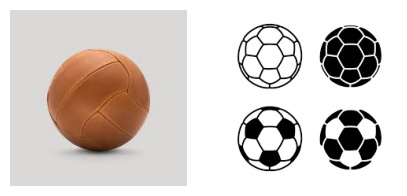

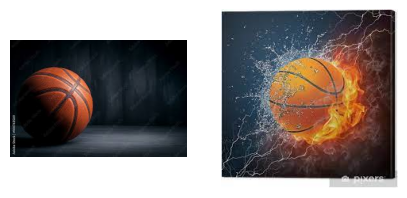

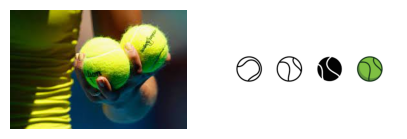

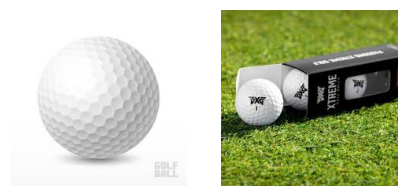

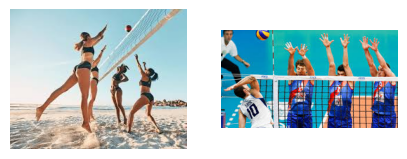

In [39]:
def count_images_in_folders(safe_folder):
    parent_dir = "C:/Users/Jarne/Documents/schooljaar 2023-2024/ai/task3/datasets"
    path = os.path.join(parent_dir, safe_folder)

    if not os.path.exists(path) or not os.path.isdir(path):
        print(f"Invalid directory: {path}")
        return
     
    classes = [class_name for class_name in os.listdir(path) if os.path.isfile(os.path.join(path, class_name))]
    
    print(f"The folder: {safe_folder} has: {len(classes)} images")
    
def showRandom2Images(safe_folder, photo_name):
    parent_dir = "C:/Users/Jarne/Documents/schooljaar 2023-2024/ai/task3/datasets"
    path = os.path.join(parent_dir, safe_folder)

    images = []

    for i in range(2):
        rnd = random.randint(0,len([class_name for class_name in os.listdir(path) if os.path.isfile(os.path.join(path, class_name))])-1)
        img_orig = cv2.imread(path + '/' + photo_name + str(rnd) + '.jpg')
        img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
        images.append(img_rgb)

    plt.figure(figsize = (5, 10))
    for i in range(2):
        plt.subplot(1,2 ,i+1)
        plt.imshow(images[i])
        plt.axis('off')

def main():
    count_images_in_folders(football_folder_name)
    count_images_in_folders(basketball_folder_name)
    count_images_in_folders(tennis_folder_name)
    count_images_in_folders(golf_folder_name)
    count_images_in_folders(volleyball_folder_name)

    showRandom2Images(football_folder_name, football_photo_name)
    showRandom2Images(basketball_folder_name, basketball_photo_name)
    showRandom2Images(tennis_folder_name, tennisball_photo_name)
    showRandom2Images(golf_folder_name, golfball_photo_name)
    showRandom2Images(volleyball_folder_name, volleyball_photo_name)

if __name__ == '__main__':
    main()

## 2.2 Data prep + imports

In [40]:
import os
import random
import shutil

In [41]:
def split_data(source_folder, training_folder, test_folder, test_percentage=0.1):
    classes = os.listdir(source_folder)

    for class_name in classes:
        class_path = os.path.join(source_folder, class_name)
        images = os.listdir(class_path)

        # Calculate the number of images for the test set
        test_size = int(len(images) * test_percentage)

        # Create destination folders
        train_class_path = os.path.join(training_folder, class_name)
        test_class_path = os.path.join(test_folder, class_name)

        if not os.path.exists(train_class_path):
            os.makedirs(train_class_path)

        if not os.path.exists(test_class_path):
            os.makedirs(test_class_path)

        # Randomly shuffle the list of images
        random.shuffle(images)

        # Move the first 'test_size' images to the test set folder
        for image_name in images[:test_size]:
            source_path = os.path.join(class_path, image_name)
            dest_path = os.path.join(test_class_path, image_name)
            shutil.move(source_path, dest_path)

        # Move the remaining images to the training set folder
        for image_name in images[test_size:]:
            source_path = os.path.join(class_path, image_name)
            dest_path = os.path.join(train_class_path, image_name)
            shutil.move(source_path, dest_path)

    # Delete the original class folders
    for class_name in classes:
        class_path = os.path.join(source_folder, class_name)
        shutil.rmtree(class_path)

def main():
    source_folder = "c:/Users/Jarne/Documents/schooljaar 2023-2024/ai/task3/datasets"
    training_folder = "c:/Users/Jarne/Documents/schooljaar 2023-2024/ai/task3/datasets/training_set"
    test_folder = "c:/Users/Jarne/Documents/schooljaar 2023-2024/ai/task3/datasets/test_set"

    split_data(source_folder, training_folder, test_folder, test_percentage=0.1)

if __name__ == '__main__':
    main()


# 3. CNN network

In [42]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [2]:
NUM_CLASSES = 5
IMG_SIZE = 64
# There is no shearing option anymore, but there is a translation option
HEIGTH_FACTOR = 0.2
WIDTH_FACTOR = 0.2

# Create a sequential model with a list of layers
model = tf.keras.Sequential([
  # Add a resizing layer to resize the images to a consistent shape
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  # Add a rescaling layer to rescale the pixel values to the [0, 1] range
  layers.Rescaling(1./255),
  # Add some data augmentation layers to apply random transformations during training
  layers.RandomFlip("horizontal"),
  layers.RandomTranslation(HEIGTH_FACTOR,WIDTH_FACTOR),
  layers.RandomZoom(0.2),

  layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(32, (3, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dense(NUM_CLASSES, activation="softmax")
])

# Compile and train your model as usual
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [3]:
from keras.utils import image_dataset_from_directory
# Set the parameters for your data
batch_size = 32
image_size = (64, 64)
validation_split = 0.2

# Create the training dataset from the 'train' directory
train_ds = image_dataset_from_directory(
    directory='datasets/training_set',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Create the validation dataset from the 'train' directory
validation_ds = image_dataset_from_directory(
    directory='datasets/training_set',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Create the testing dataset from the 'test' directory
test_ds = image_dataset_from_directory(
    directory='datasets/test_set',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size
)

Found 22500 files belonging to 5 classes.
Using 18000 files for training.
Found 22500 files belonging to 5 classes.
Using 4500 files for validation.
Found 2500 files belonging to 5 classes.


# 4. Training model

In [6]:
steps_per_epoch = len(train_ds)
history = model.fit(train_ds,
                validation_data = validation_ds,
                steps_per_epoch = steps_per_epoch,
                epochs = 100,
                verbose=1,  # Set to 1 to see training progress
                callbacks=[
                  # Add early stopping to prevent overfitting
                  tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),

                  # Add learning rate scheduling
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7),

                  # Add model checkpoint to save the best weights during training
                  tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
              ]
                )

Epoch 1/100


563/563 [==============================] - 21s 37ms/step - loss: 1.0141 - accuracy: 0.6121 - val_loss: 0.7945 - val_accuracy: 0.7016 - lr: 0.0010
Epoch 2/100
  1/563 [..............................] - ETA: 1:02 - loss: 0.8696 - accuracy: 0.6875

c:\Users\Jarne\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


563/563 [==============================] - 20s 36ms/step - loss: 0.8469 - accuracy: 0.6807 - val_loss: 0.6991 - val_accuracy: 0.7476 - lr: 0.0010
Epoch 3/100
563/563 [==============================] - 21s 37ms/step - loss: 0.7223 - accuracy: 0.7327 - val_loss: 0.6534 - val_accuracy: 0.7582 - lr: 0.0010
Epoch 4/100
563/563 [==============================] - 22s 38ms/step - loss: 0.6270 - accuracy: 0.7677 - val_loss: 0.5075 - val_accuracy: 0.8249 - lr: 0.0010
Epoch 5/100
563/563 [==============================] - 22s 39ms/step - loss: 0.5569 - accuracy: 0.7954 - val_loss: 0.4553 - val_accuracy: 0.8324 - lr: 0.0010
Epoch 6/100
563/563 [==============================] - 21s 38ms/step - loss: 0.4882 - accuracy: 0.8231 - val_loss: 0.4246 - val_accuracy: 0.8484 - lr: 0.0010
Epoch 7/100
563/563 [==============================] - 21s 37ms/step - loss: 0.4458 - accuracy: 0.8373 - val_loss: 0.3626 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 8/100
563/563 [==============================] - 21s 37ms/

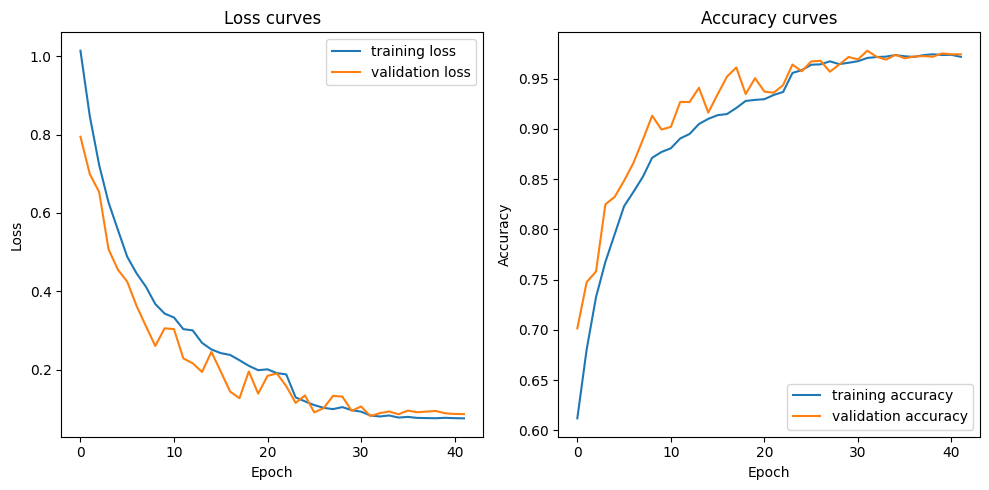

In [7]:
# Create a figure and a grid of subplots with a single call
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the loss curves on the first subplot
ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss curves')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the accuracy curves on the second subplot
ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy curves')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

In [8]:
model.save("saved_models/model")

INFO:tensorflow:Assets written to: saved_models/model\assets


INFO:tensorflow:Assets written to: saved_models/model\assets


## 4.1 Checking our model

In [9]:
test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy (model_new):', test_acc)

79/79 [==============================] - 1s 15ms/step - loss: 0.0970 - accuracy: 0.9756
Test accuracy (model_new): 0.975600004196167


# 5. Comparing model to Google's Teachable Machine